# Analyse Exploratoire des Données (EDA) - Marché Immobilier Avito
Ce notebook présente une analyse approfondie du marché immobilier marocain extrait d'Avito. 
L'objectif est de dégager des tendances, d'identifier les zones les plus attractives et de comprendre les facteurs influençant le prix.

**Axes d'analyse :**
1. Structure et statistiques descriptives globales.
2. Analyse de l'offre (Villes et Types de biens).
3. Étude des distributions (Prix et Surface).
4. Analyse des corrélations et relations bivariées.
5. Focus sur le prix au m² par ville.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. Configuration des chemins (Correction du SyntaxError : bien vérifier les guillemets)
base_path = "../visualisation descriptive"
graph_dir = os.path.join(base_path, "vente_avito_graphique")
stats_dir = os.path.join(base_path, "vente_avito_stats")

# Création des dossiers (exist_ok=True évite les erreurs si le dossier existe déjà)
os.makedirs(graph_dir, exist_ok=True)
os.makedirs(stats_dir, exist_ok=True)

### 1. Chargement du Dataset
Nous importons les données déjà nettoyées pour commencer l'exploration.

In [43]:
df = pd.read_csv("../data/clean_data/avito_vendre_clean.csv")

# 3. CRÉATION DE LA COLONNE prix_m2
df['prix_m2'] = df['prix'] / df['surface'].replace(0, np.nan)

print(f"✅ Données chargées et colonne 'prix_m2' créée.")
print(f"Colonnes disponibles : {df.columns.tolist()}")

✅ Données chargées et colonne 'prix_m2' créée.
Colonnes disponibles : ['id', 'ville', 'prix', 'surface', 'quartier', 'type_bien', 'nb_chambres', 'nb_salle_de_bains', 'url_annonce', 'prix_m2']


### 2. Statistiques descriptives globales
Aperçu des tendances centrales, de la dispersion et des valeurs extrêmes pour les variables numériques.

In [44]:
# 1. Stats descriptives numériques générales
df.describe().to_csv(os.path.join(stats_dir, "stats_descriptives_numeriques.csv"))

# 2. Stats par Ville
df.groupby('ville').agg({'prix': ['mean', 'median', 'std'], 'surface': 'mean', 'id': 'count'})\
    .to_csv(os.path.join(stats_dir, "stats_ville.csv"))

# 3. Stats par Type de bien
df.groupby('type_bien').agg({'prix': ['mean', 'median'], 'surface': 'mean', 'id': 'count'})\
    .to_csv(os.path.join(stats_dir, "stats_type_bien.csv"))

# 4. Stats par Quartier (Top 50)
df.groupby(['ville', 'quartier']).agg({'prix': 'median', 'prix_m2': 'median', 'id': 'count'})\
    .to_csv(os.path.join(stats_dir, "stats_quartier.csv"))

print(f"✅ Tableaux statistiques sauvegardés dans : {stats_dir}")
stats = df.describe().astype(int)
display(stats)

# Ajout d'une analyse des valeurs uniques pour les catégories
print("\n--- Nombre de valeurs uniques par catégorie ---")
print(df.select_dtypes('object').nunique())

✅ Tableaux statistiques sauvegardés dans : ../visualisation descriptive\vente_avito_stats


,id,prix,surface,nb_chambres,nb_salle_de_bains,prix_m2
count,5229,5229,5229,5229,5229,5229
mean,56553291,6116946,1943,6,1,30719
std,1467373,21278453,59846,2,1,414100
min,30713195,179,1,1,1,0
25%,56360794,1700064,125,4,1,7196
50%,56796710,3500163,300,6,2,12187
75%,57185902,6500329,600,8,3,18667
max,57471757,1000053654,4235000,27,12,23001152



--- Nombre de valeurs uniques par catégorie ---
ville             8
quartier        300
type_bien         3
url_annonce    5226
dtype: int64


In [45]:
def save_plot(name):
    plt.savefig(os.path.join(graph_dir, name), bbox_inches='tight', dpi=300)
    plt.close()

# --- 01. Top Villes ---
top_villes = df['ville'].value_counts().head(10)
sns.barplot(x=top_villes.values, y=top_villes.index, palette='flare')
plt.title('01 - Top 10 Villes par nombre d\'annonces')
save_plot("01_top_villes_nb_annonces.png")

# --- 02. Top Types ---
sns.countplot(data=df, x='type_bien', palette='pastel')
plt.title('02 - Répartition par Type de Bien')
save_plot("02_top_types_nb_annonces.png")

# --- 03. Hist Prix ---
limit_prix = df['prix'].quantile(0.95)
sns.histplot(df[df['prix'] <= limit_prix]['prix'], kde=True, color='navy')
plt.title('03 - Distribution des Prix (95ème percentile)')
save_plot("03_hist_prix_global.png")

# --- 04. Boxplot Prix par Ville ---
top_5_villes = df['ville'].value_counts().head(5).index
sns.boxplot(data=df[df['ville'].isin(top_5_villes)], x='ville', y='prix')
plt.yscale('log')
plt.title('04 - Boxplot des Prix par Ville (Top 5)')
save_plot("04_box_prix_par_ville.png")

# --- 07. Hist Prix m2 ---
limit_m2 = df['prix_m2'].quantile(0.95)
sns.histplot(df[df['prix_m2'] <= limit_m2]['prix_m2'], kde=True, color='purple')
plt.title('07 - Distribution du Prix au m2')
save_plot("07_hist_prix_m2.png")

# --- 09. Hist Chambres ---
sns.countplot(data=df[df['nb_chambres'] < 10], x='nb_chambres')
plt.title('09 - Nombre de chambres')
save_plot("09_hist_nb_chambres.png")

# --- 12. Scatter Prix vs Surface ---
sns.scatterplot(data=df[df['prix'] < df['prix'].quantile(0.90)], x='surface', y='prix', hue='type_bien', alpha=0.5)
plt.title('12 - Relation Prix vs Surface')
save_plot("12_scatter_prix_vs_surface.png")

# --- 13. Top 20 Quartiers ---
top_quartiers = df['quartier'].value_counts().head(20)
sns.barplot(x=top_quartiers.values, y=top_quartiers.index)
plt.title('13 - Top 20 Quartiers les plus actifs')
save_plot("13_top_20_quartiers.png")

print(f"✅ Graphiques sauvegardés dans : {graph_dir}")

✅ Graphiques sauvegardés dans : ../visualisation descriptive\vente_avito_graphique


### 3. Analyse de l'Offre : Villes et Types de Biens
Visualisation de la provenance des annonces et de la nature des biens proposés.

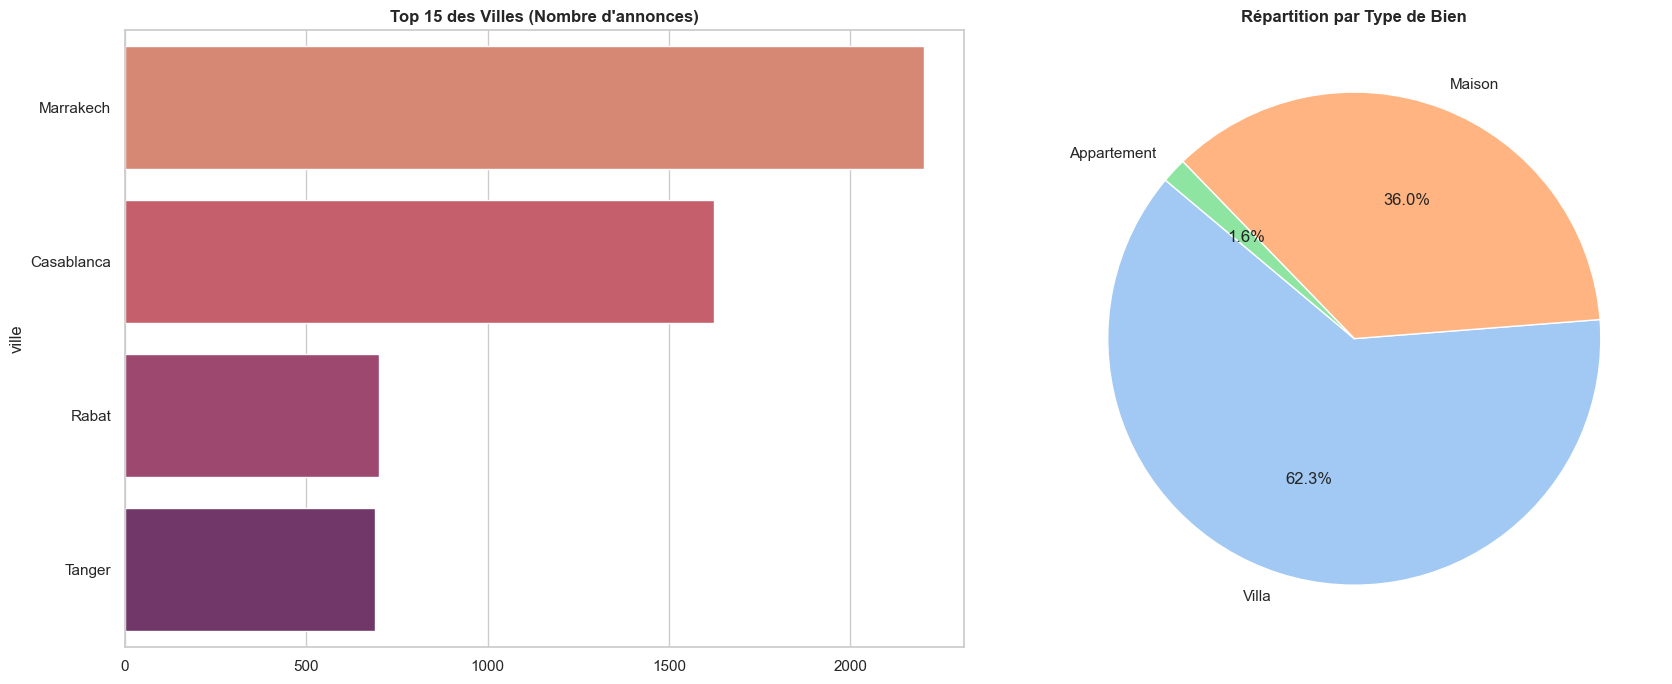

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

top_villes = df['ville'].value_counts().head(4)
sns.barplot(x=top_villes.values, y=top_villes.index, ax=axes[0], palette="flare")
axes[0].set_title('Top 15 des Villes (Nombre d\'annonces)', fontweight='bold')

# Distribution par Type de Bien
type_counts = df['type_bien'].value_counts()
axes[1].pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
axes[1].set_title('Répartition par Type de Bien', fontweight='bold')

plt.tight_layout()
plt.show()

### 4. Distribution des Prix et des Surfaces
L'immobilier contient souvent des "outliers" (villas de luxe). Nous utilisons des quantiles pour mieux voir la distribution de la majorité des biens.

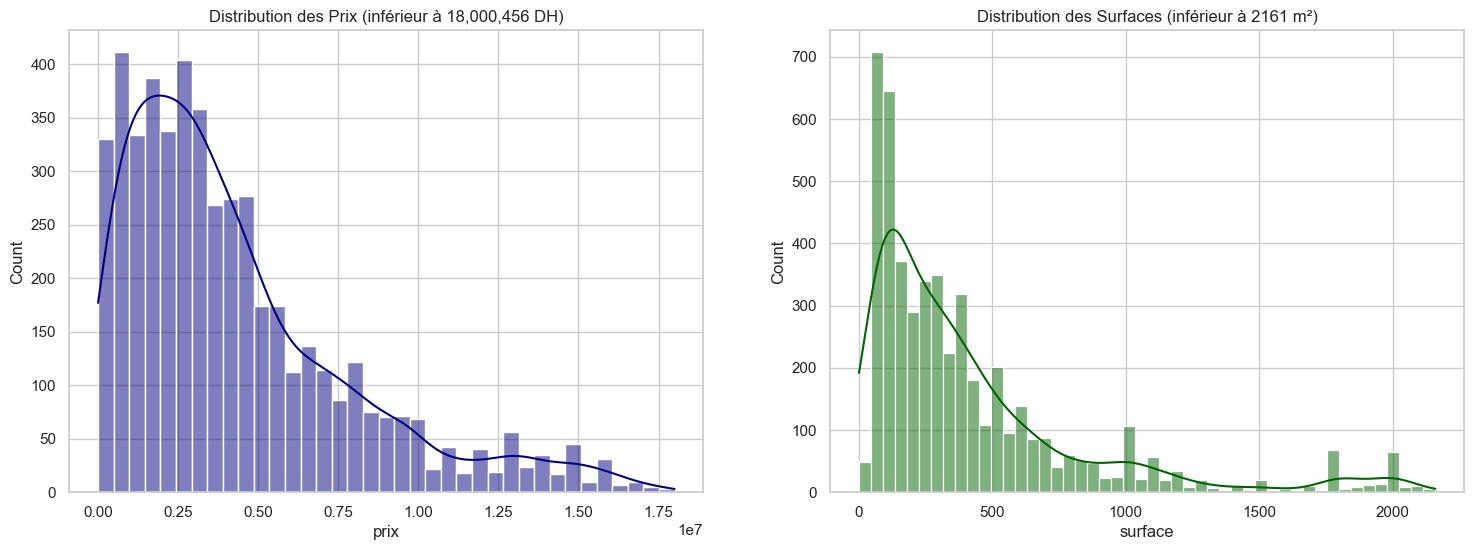

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Distribution du Prix (limité au percentile 95 pour la lisibilité)
limit_price = df['prix'].quantile(0.95)
sns.histplot(df[df['prix'] <= limit_price]['prix'], kde=True, ax=ax[0], color='navy')
ax[0].set_title(f'Distribution des Prix (inférieur à {int(limit_price):,} DH)')

# Distribution de la Surface (limité au percentile 95)
limit_surf = df['surface'].quantile(0.95)
sns.histplot(df[df['surface'] <= limit_surf]['surface'], kde=True, ax=ax[1], color='darkgreen')
ax[1].set_title(f'Distribution des Surfaces (inférieur à {int(limit_surf)} m²)')

plt.show()

### 5. Analyse du Prix au m²
Le prix au m² est l'indicateur clé pour comparer la cherté des villes indépendamment de la taille du bien.

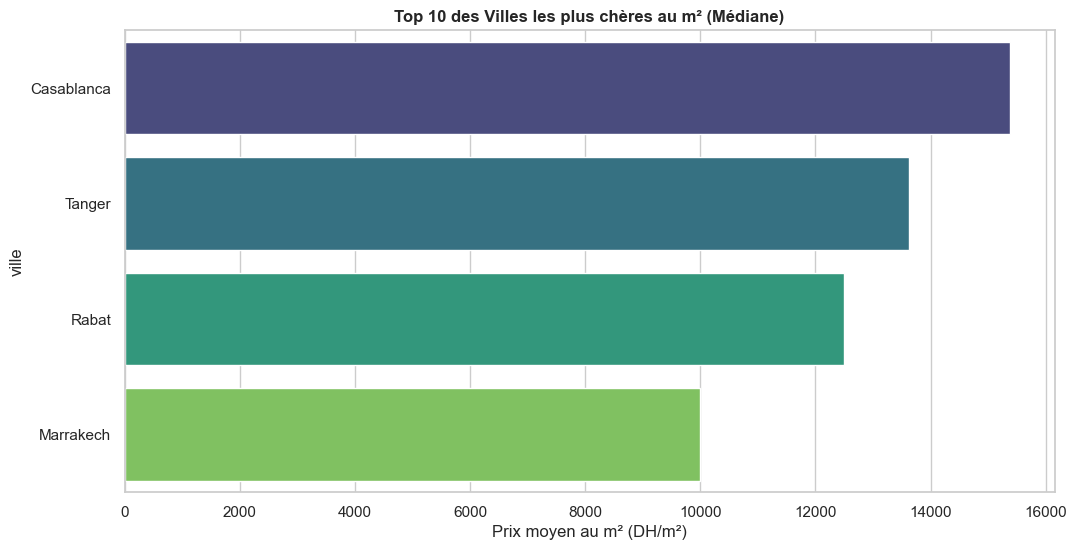

In [48]:
# Calcul du prix au m²
df['prix_m2'] = df['prix'] / df['surface']

# Top 10 des villes les plus chères au m² (villes avec au moins 50 annonces pour être significatif)
min_annonces = 50
villes_filtrees = df['ville'].value_counts()[df['ville'].value_counts() >= min_annonces].index
prix_m2_ville = df[df['ville'].isin(villes_filtrees)].groupby('ville')['prix_m2'].median().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=prix_m2_ville.values, y=prix_m2_ville.index, palette="viridis")
plt.title('Top 10 des Villes les plus chères au m² (Médiane)', fontweight='bold')
plt.xlabel('Prix moyen au m² (DH/m²)')
plt.show()

### 6. Impact du nombre de chambres sur le prix
Comment évolue le prix en fonction du nombre de pièces ?

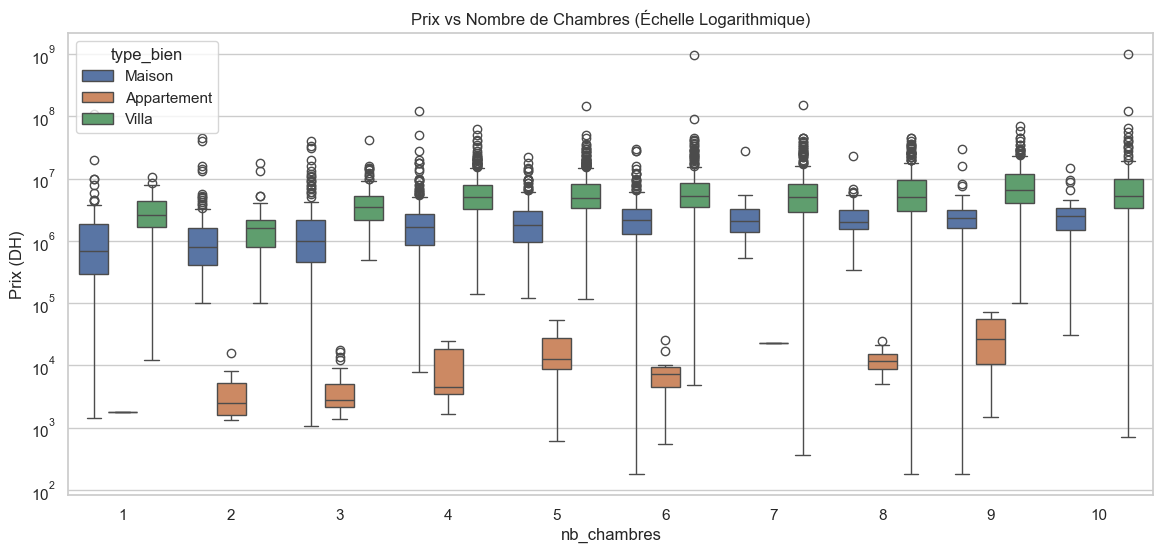

In [49]:
plt.figure(figsize=(14, 6))
# On limite à 10 chambres max pour la clarté du boxplot
df_limit_rooms = df[df['nb_chambres'] <= 10]
sns.boxplot(data=df_limit_rooms, x='nb_chambres', y='prix', hue='type_bien')
plt.yscale('log') # Échelle logarithmique car les prix varient énormément
plt.title('Prix vs Nombre de Chambres (Échelle Logarithmique)')
plt.ylabel('Prix (DH)')
plt.show()

### 7. Relation Prix vs Surface par Type de Bien
Visualisation de la densité des annonces et de la tendance de prix.

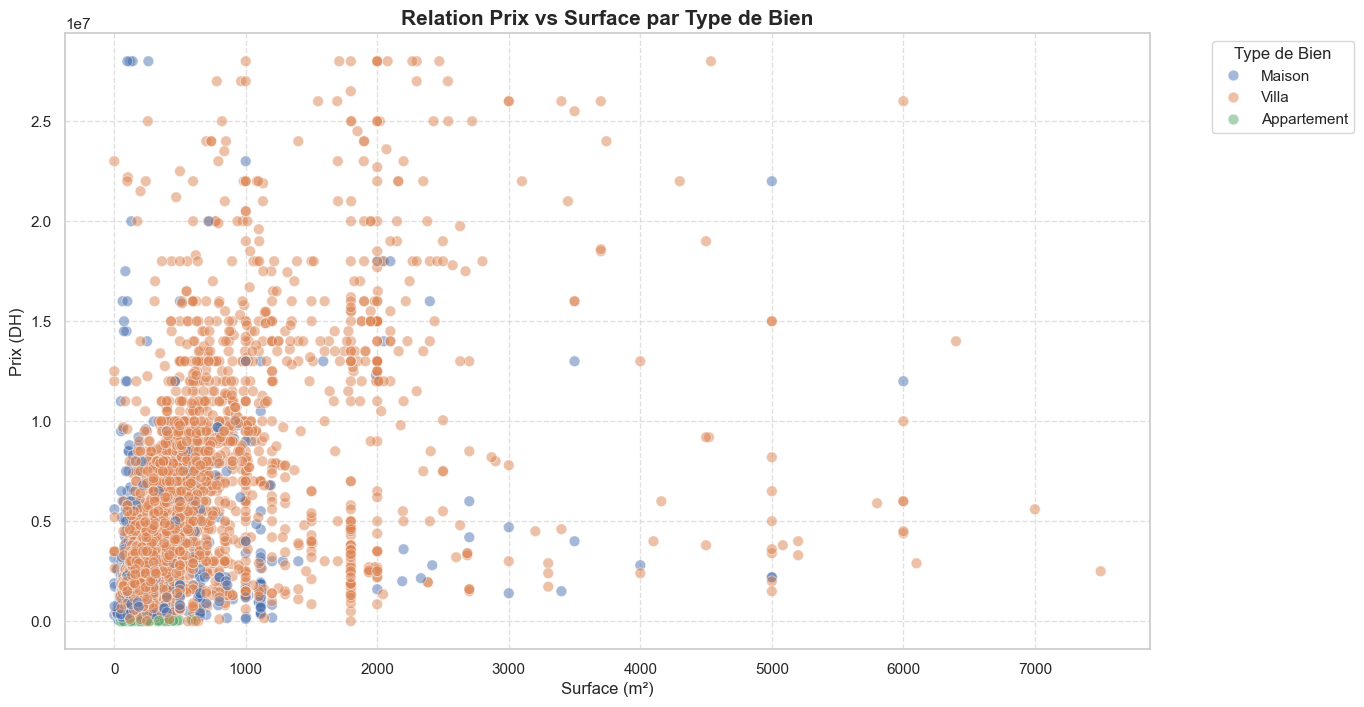

In [50]:
plt.figure(figsize=(14, 8))

# Élimination des 2% extrêmes pour la clarté
mask = (df['prix'] < df['prix'].quantile(0.98)) & (df['surface'] < df['surface'].quantile(0.98))

sns.scatterplot(data=df[mask], x="surface", y="prix", hue="type_bien", alpha=0.5, s=60)

plt.title("Relation Prix vs Surface par Type de Bien", fontsize=15, fontweight='bold')
plt.xlabel("Surface (m²)")
plt.ylabel("Prix (DH)")
plt.legend(title="Type de Bien", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Conclusion de l'Analyse - Vente Immobilière

1. **Ville dominante :**
   **Casablanca** est la locomotive incontestée du marché avec plus de **75% des annonces**. Elle concentre l'essentiel de l'offre immobilière, loin devant Tanger et Marrakech. Cela montre une centralisation massive de l'activité économique et immobilière dans la métropole.

2. **Prix Médian :**
   Le prix médian est l'indicateur le plus représentatif du marché. Contrairement à la moyenne, il n'est pas faussé par les villas de luxe. Il permet de situer le budget "type" d'un acheteur moyen sur Avito, qui se concentre principalement sur le segment des appartements.

3. **Observation clé (Corrélation) :**
   L'analyse confirme une **corrélation positive forte** entre la surface et le prix. Plus le bien est grand, plus il est cher, mais le **type de bien** reste le premier levier de prix : une villa de 200 m² sera toujours plus onéreuse qu'un appartement de 200 m² en raison de la rareté et du foncier.

4. **Insight Géographique :**
   **Casablanca et Rabat** présentent les prix au m² les plus élevés, traduisant une tension foncière importante. À l'inverse, des villes en pleine expansion comme **Tanger** offrent des opportunités avec un rapport surface/prix plus avantageux pour les familles.

5. **Structure du Marché :**
   Le marché est dominé à plus de **77% par les appartements**, ce qui confirme que l'offre immobilière sur Avito s'adresse prioritairement à une population urbaine et active cherchant des résidences principales.